In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted
from os.path import exists,basename
from glob import glob
import cv2
import os
from os.path import join
import numpy as np
%matplotlib inline

In [6]:
## Src_dire
crop_dire='plot/crop/npy/Drink.Fromcan_p03_r00_v18_c03.npy'
raw_video_dire='plot/crop/vid/Drink.Fromcan_p03_r00_v18_c03.mp4'
pose_video_dire='plot/crop/pose_vid/Drink.Fromcan_p03_r00_v18_c03.mp4'
img_id='plot/crop/img_id/Drink.Fromcan_p03_r00_v18_c03.npy'

In [7]:
##target_dire
save_raw_images='plot/crop/Raw.Images/'
save_crop_images='plot/crop/Crop.Images/'
save_pose_images='plot/crop/Skeleton.Images/'

In [8]:
imgs_ids=[int(i.split('.')[0]) for i in np.load(img_id)]

In [9]:
cap_raw=cv2.VideoCapture(raw_video_dire)
for id in imgs_ids:
    cap_raw.set(cv2.CAP_PROP_POS_FRAMES, id)
    _,frame=cap_raw.read()
    target_dire=join(save_raw_images,'{:04d}.jpg'.format(id))
    cv2.imwrite(target_dire,frame)

In [10]:

  
cap_pose=cv2.VideoCapture(pose_video_dire)
for id in imgs_ids:
    cap_pose.set(cv2.CAP_PROP_POS_FRAMES, id)
    _,frame=cap_pose.read()
    target_dire=join(save_pose_images,'{:04d}.jpg'.format(id))
    cv2.imwrite(target_dire,frame)
        

   

In [11]:
##img _dire
for idx,frame in enumerate(np.load(crop_dire)):
    id=imgs_ids[idx]
    target_dire=join(save_crop_images,'{:04d}.jpg'.format(id))
    cv2.imwrite(target_dire,frame)



In [14]:
img_folders=['Raw.Images','Skeleton.Images','Crop.Images']

In [16]:
classname=img_folders[0]

In [17]:
titlename=classname.split('_')[0].split('.')[0]+'\n'+classname.split('_')[0].split('.')[1]

'Raw\nImages'

/tmp/ipykernel_893141/675106237.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.004)


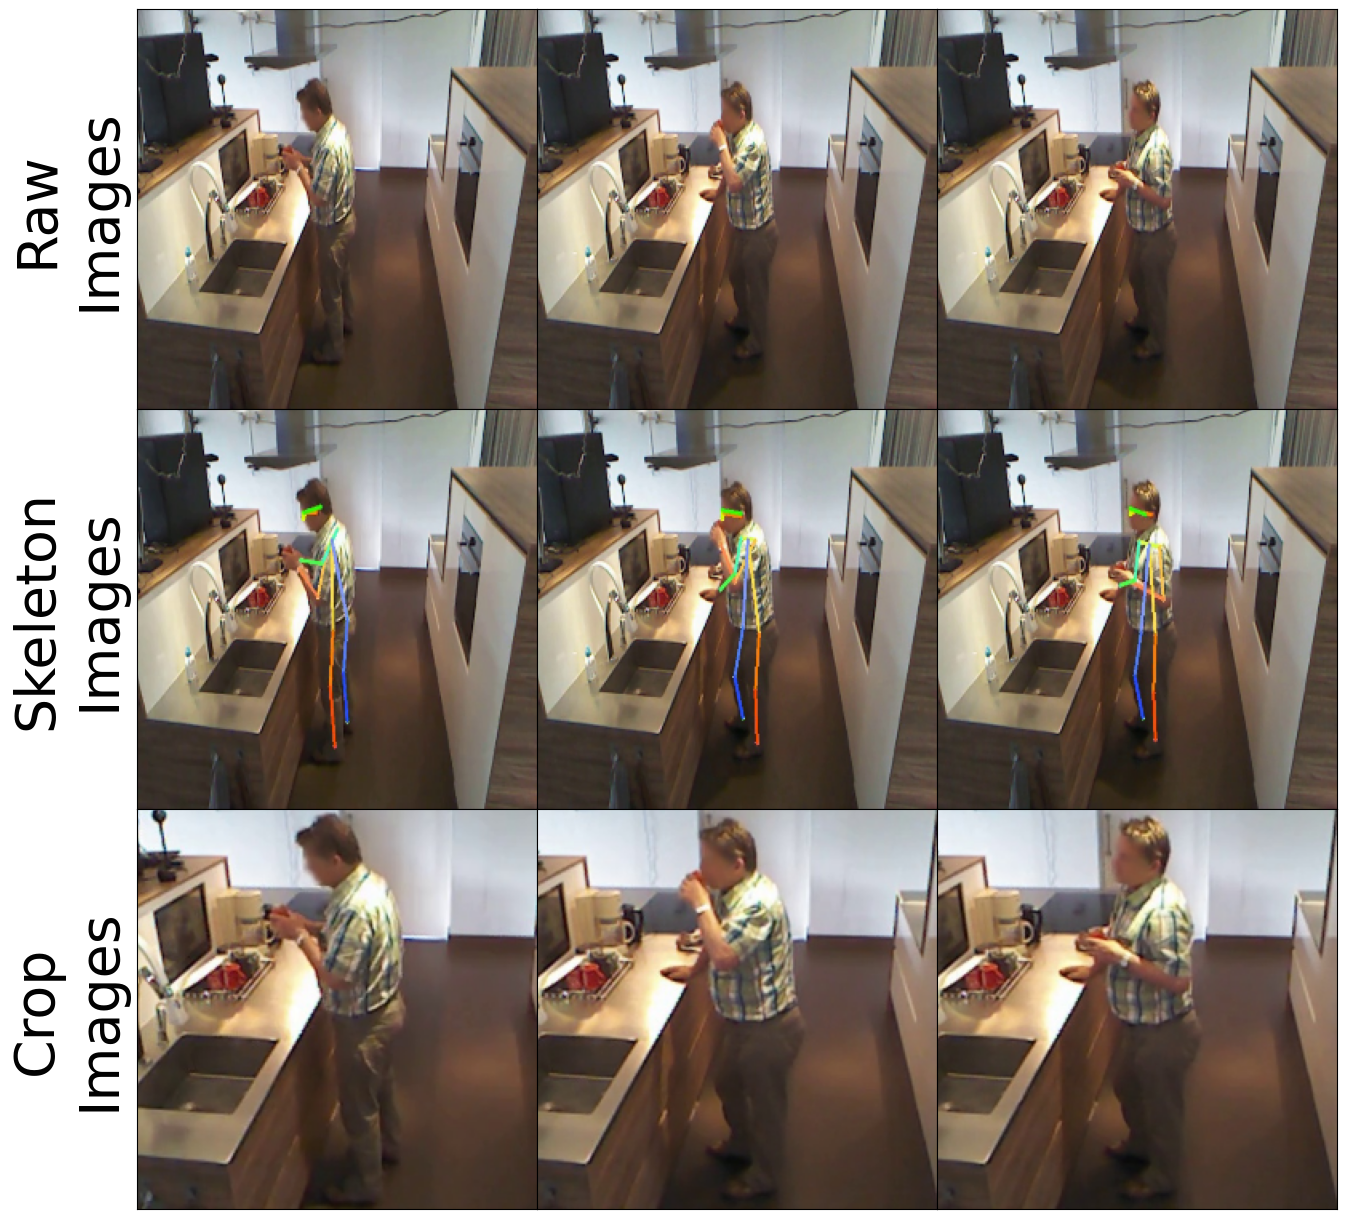

In [21]:


fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,15),gridspec_kw={'left':0.1, 'right':0.7, 'bottom':0.1, 'top':0.9, 'wspace':0, 'hspace':0})

fig.tight_layout(pad=0.004)
fig.subplots_adjust(wspace=0.001, hspace=0.05)

for j,classname in enumerate(img_folders):
    
    titlename=classname.split('_')[0].split('.')[0]+'\n'+classname.split('_')[0].split('.')[1]
    for i,img_dire in enumerate(glob((os.path.join('plot/crop/',classname)+'/*.jpg'))):
        img=cv2.imread(img_dire)
        img=cv2.resize(img,(250,250))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axes[j][i].imshow(img)
        axes[j][i].set_yticks([])
        axes[j][i].set_xticks([])
        

        if i == 0:
            axes[j][i].set_ylabel(titlename,fontsize=40 )
       

fig.savefig("{}Crop.jpg".format('plot/crop/'), bbox_inches='tight')